In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the new dataset
file_name = 'teams_data_cleaned.csv'
df_teams = pd.read_csv(file_name)

In [4]:
# ---  Initial Data Inspection ---

print(f"Successfully loaded '{file_name}'. Now inspecting the data...")

print("\n--- DataFrame Head (First 5 Rows) ---")
df_teams.head()

Successfully loaded 'teams_data_cleaned.csv'. Now inspecting the data...

--- DataFrame Head (First 5 Rows) ---


,team_id,team_name,team_name_short
0,1,Royal Challengers Bangalore,RCB
1,2,Sunrisers Hyderabad,SRH
2,3,Mumbai Indians,MI
3,4,Rising Pune Supergiant,RPS
4,5,Gujarat Lions,GL


In [5]:
print("\n--- DataFrame Info (Column Types and Missing Values) ---")
df_teams.info()

print("\n--- DataFrame Description (Numerical Summary) ---")
print(df_teams.describe())

print("\n--- List of All Columns ---")
print(df_teams.columns.to_list())


--- DataFrame Info (Column Types and Missing Values) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   team_id          16 non-null     int64 
 1   team_name        16 non-null     object
 2   team_name_short  16 non-null     object
dtypes: int64(1), object(2)
memory usage: 516.0+ bytes

--- DataFrame Description (Numerical Summary) ---
          team_id
count    16.00000
mean    610.25000
std     940.96989
min       1.00000
25%       4.75000
50%     193.00000
75%     728.25000
max    3604.00000

--- List of All Columns ---
['team_id', 'team_name', 'team_name_short']


In [7]:
# 2. Check for Duplicates
duplicate_ids = df_teams['team_id'].duplicated().sum()
duplicate_names = df_teams['team_name'].duplicated().sum()

if duplicate_ids == 0 and duplicate_names == 0:
    print("Data Integrity Check PASSED: 'team_id' and 'team_name' are unique.")
else:
    print(f"Data Integrity Check FAILED: Found {duplicate_ids} duplicate IDs and {duplicate_names} duplicate names.")

Data Integrity Check PASSED: 'team_id' and 'team_name' are unique.


In [8]:
# 3. Save Cleaned Data
cleaned_file_name = 'teams_data_cleaned.csv'
df_teams.to_csv(cleaned_file_name, index=False)
print(f"\nCleaned data saved to '{cleaned_file_name}'.")


Cleaned data saved to 'teams_data_cleaned.csv'.


In [9]:
# ---  Exploratory Data Analysis (EDA) ---
print("\nStarting EDA...")

# 1. List Teams
print("\n--- Full List of Teams ---")
# Set index to team_id for a cleaner print
print(df_teams.set_index('team_id'))

print("\nEDA complete. This file is a lookup table and is now fully cleaned.")


Starting EDA...

--- Full List of Teams ---
                           team_name team_name_short
team_id                                             
1        Royal Challengers Bangalore             RCB
2                Sunrisers Hyderabad             SRH
3                     Mumbai Indians              MI
4             Rising Pune Supergiant             RPS
5                      Gujarat Lions              GL
6              Kolkata Knight Riders             KKR
129              Chennai Super Kings             CSK
134                 Rajasthan Royals              RR
252                   Delhi Capitals              DC
494                     Punjab Kings              PK
614             Lucknow Super Giants             LSG
615                   Gujarat Titans              GT
1068                 Deccan Chargers             DEC
1414            Kochi Tuskers Kerala             KTK
1419                   Pune Warriors             PWI
3604         Rising Pune Supergiants             RPS



# ******************************************************************************************

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn libraries for the ML pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [ ]:
#  Load Data

# We use the player data which has features suitable for prediction
file_path = 'players_data_cleaned.csv'
print(f"Loading data from {file_path}...")
df = pd.read_csv(file_path)

Loading data from players_data_cleaned.csv...


In [4]:
# Feature Engineering

print("\n---  Feature Engineering ---")

# Function to simplify fielding positions
def clean_field_pos(pos):
    pos = str(pos).strip()
    # Keep Wicketkeepers separate, group everyone else as 'Fielder'
    if pos in ['Wicketkeeper', 'Occasional Wicketkeeper']:
        return pos
    else:
        return 'Fielder'

# Apply the cleaning
df['field_pos_cleaned'] = df['field_pos'].apply(clean_field_pos)
df['bowl_style'] = df['bowl_style'].replace(' ', 'Unknown')

# Define our Features (X) and Target (y)
X = df[['bowl_style', 'field_pos_cleaned']]
y = df['bat_style']

print("Features selected: bowl_style, field_pos_cleaned")
print("Target to predict: bat_style")


---  Feature Engineering ---
Features selected: bowl_style, field_pos_cleaned
Target to predict: bat_style


In [6]:
#  Encoding Categorical Data
print("\n---  Encoding Data ---")

# Encode Target (y) using LabelEncoder (Text -> 0, 1, 2...)
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print(f"Target encoded classes: {le.classes_}")

# Prepare Feature Encoding (X) using OneHotEncoder
# We use ColumnTransformer to apply this ONLY to the categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['bowl_style', 'field_pos_cleaned'])
    ])


---  Encoding Data ---
Target encoded classes: ['Left hand Bat' 'Right hand Bat']


In [7]:
#  Split Data
print("\n--- Splitting Data ---")
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
print(f"Training Data Size: {len(X_train)}")
print(f"Testing Data Size: {len(X_test)}")


--- Splitting Data ---
Training Data Size: 617
Testing Data Size: 155


In [9]:
# 5. Train All Models & Find Best Model

print("\n---Training & Evaluating Models ---")

# Dictionary of models to test
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(kernel='linear'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

best_accuracy = 0
best_model_name = ""

for name, model in models.items():
    # Create a Pipeline: Preprocessor -> Model
    # This ensures encoding happens correctly inside the cross-validation/training
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    
    # Train the model
    clf.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    
    print(f"{name} Accuracy: {acc:.4f}")
    
    # Track the best model
    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = name

print(f"\n>> BEST MODEL: {best_model_name} with {best_accuracy:.4f} accuracy")



---Training & Evaluating Models ---
Logistic Regression Accuracy: 0.7806
Random Forest Accuracy: 0.7935
Support Vector Machine Accuracy: 0.7806
Gradient Boosting Accuracy: 0.7806

>> BEST MODEL: Random Forest with 0.7935 accuracy



--- Feature Importance Analysis ---
                              Feature  Importance
20  bowl_style_Slow Left arm Orthodox    0.301340
3     bowl_style_Left arm Medium fast    0.111942
2          bowl_style_Left arm Medium    0.107107
1     bowl_style_Left arm Fast medium    0.054209
0            bowl_style_Left arm Fast    0.048494
10   bowl_style_Right arm Fast medium    0.040631
21                 bowl_style_Unknown    0.037379
22          field_pos_cleaned_Fielder    0.036412
4      bowl_style_Left arm Wrist spin    0.035086
11        bowl_style_Right arm Medium    0.030448


C:\Users\Rohit\AppData\Local\Temp\ipykernel_5124\1431667029.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


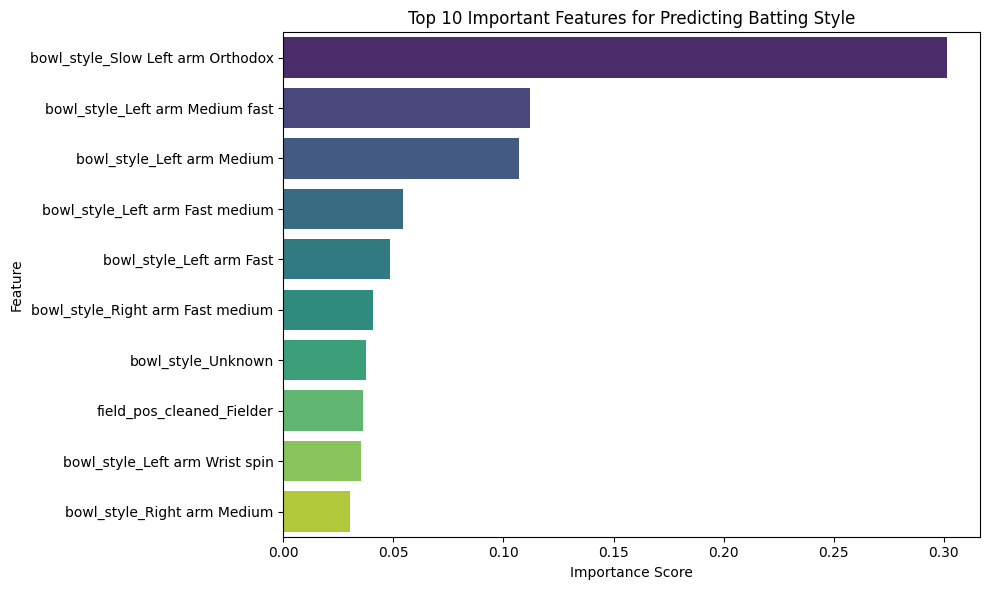

In [10]:


# Find Important Features

print("\n--- Feature Importance Analysis ---")

# We retrain a Random Forest model specifically to extract feature importance
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])
rf_model.fit(X_train, y_train)

# Get feature names from the OneHotEncoder
feature_names = rf_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()

# Get importance scores from the Classifier
importances = rf_model.named_steps['classifier'].feature_importances_

# Create a DataFrame to view results
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display Top 10
print(feature_importance_df.head(10))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Important Features for Predicting Batting Style')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()